Reproduces the OKCUSUM part of Figure 4.

In [1]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb as nchoosek
from mmdew.fast_rbf_kernel import est_gamma
from mmdew.detectors import FastOKCUSUM
from tqdm import tqdm

In [2]:
rng = np.random.default_rng()

In [3]:
d=20

In [194]:
ref_size=1000
reps=25
target_arl=15000

In [195]:
statistics = []

for _ in tqdm(range(reps)):
    ref = rng.normal(size=(ref_size,d))

    detector = FastOKCUSUM(ref, B_max=50, N=15)
    
    data = rng.normal(size=(target_arl*10,d))
    
    for elem in data:
        detector.add_element(elem.reshape(1,-1))
    statistics += detector.stats

100%|██████████████████████████████████████| 25/25 [16:16:12<00:00, 2342.88s/it]


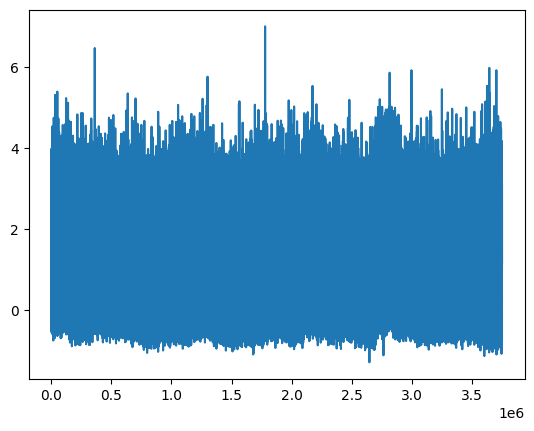

In [196]:
plt.plot(statistics)

In [197]:
import pickle

In [198]:
with open('okcusum-statistics.pickle', 'wb') as handle:
    pickle.dump(statistics, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [199]:
with open('okcusum-statistics.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [200]:
threshold = np.quantile(statistics, 1-(1/target_arl))

In [201]:
threshold

np.float64(4.6996046959922575)

In [202]:
np.sum(detector.stats > threshold) # arl

np.int64(54)

In [203]:
threshold #somewhat lower than the one given in their article's Figure 3 but we also have lower values of the test statistic for Figure 1. Might be due to a slight difference in the median heuristic.

np.float64(4.6996046959922575)

In [204]:
target_arls_log = np.arange(3,5.1,.25)

arl2thresh = { i : np.quantile(statistics, 1-(1/10**i)) for i in target_arls_log}